# Maestría en Física Médica - Taller de Informática


# Interpolación - Scipy


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Interpolación

## Fundamentos

La *interpolación* consiste en encontrar una función $f(x)$ tal que, dadas las abscisas 
$$
x_0,x_1,\cdots,x_{n-1}
$$
y sus correspondientes valores de ordenadas
$$
y_0,y_1,\cdots,y_{n-1}
$$
se verifique que:
$$
f(x_i) = y_i \;\;\; \textrm{para cualquier} \;\; 0\le i < n
$$

Si lo pensamos en el plano, queremos buscar una curva $f(x)$ que pase por todos los puntos $(x_i,y_i)$, con $0\le i < n$.




In [2]:
xData = np.linspace(-3,3,11)
xData

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [3]:
yData = np.array([1.23409804e-04, 3.15111160e-03, 3.91638951e-02, 2.36927759e-01,
       6.97676326e-01, 1.00000000e+00, 6.97676326e-01, 2.36927759e-01,
       3.91638951e-02, 3.15111160e-03, 1.23409804e-04])
yData

array([1.23409804e-04, 3.15111160e-03, 3.91638951e-02, 2.36927759e-01,
       6.97676326e-01, 1.00000000e+00, 6.97676326e-01, 2.36927759e-01,
       3.91638951e-02, 3.15111160e-03, 1.23409804e-04])

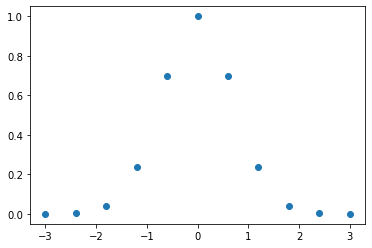

In [4]:
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.show()

> La interpolación tiene dos etapas:
1. Encontrar la función interpoladora $f(x)$
2. Evaluar la función interpoladora en los valores deseados

## Interpolación polinomial (de Newton)

Por supuesto que es extremadamente difícil encontrar una función $f(x)$ general para cualquier cantidad de puntos $(x_i,y_i)$ dados como datos. Por eso se utilizan *polinomios* de distinto grado para satisfacer las condiciones de la interpolación. 

Una de las posibles formas funcionales corresponde a los polinomios de Newton, definidos como:

$$
P_n(x) = a_0 + a_1 (x - x_0) + a_2 (x-x_0)(x-x_1) + \cdots + a_n (x-x_0)(x-x_1)(x-x_2)\cdots(x-x_{n-1})
$$

Por ejemplo, el polinomio de Newton para ajustar tres puntos $(x_0,y_0)$, $(x_1,y_1)$ y $(x_2,y_2)$ es:

$$
P_2(x) = a_0 + a_1 (x - x_0) + a_2 (x-x_0)(x-x_1)
$$

Y en este caso, tenemos que buscar los valores $a_0, a_1, a_2$ de forma tal que:

\begin{align}
y_0 &= P_2(x_0) \\
y_1 &= P_2(x_1) \\
y_2 &= P_2(x_2) 
\end{align}
Reemplazando:

\begin{align}
y_0 &= a_0 \\
y_1 &= a_0 + a_1 (x_1 - x_0) \\
y_2 &= a_0 + a_1 (x_2 - x_0) + a_2 (x_2-x_0)(x_2-x_1)
\end{align}

Este sistema es sencillo de resolver, empezando por la primer ecuación

$$
a_0 = y_0
$$

continuando por la segunda:
\begin{align}
y_1 &= y_0 + a_1 (x_1 - x_0) \\
y_1 - y_0 &= a_1 (x_1 - x_0) \\
a_1 &=  \frac{y_1 - y_0 }{x_1 - x_0}
\end{align}

y finalmente reemplazando $a_0$ y $a_1$ en la tercera ecuación:
\begin{align}
y_2 &= a_0 + a_1 (x_2 - x_0) + a_2 (x_2-x_0)(x_2-x_1) \\
y_2 &= y_0 + \frac{y_1 - y_0 }{x_1 - x_0} (x_2 - x_0) + a_2 (x_2-x_0)(x_2-x_1) \\
a_2 (x_2-x_0)(x_2-x_1) &= y_2 - y_0 - \frac{y_1 - y_0 }{x_1 - x_0} (x_2 - x_0) 
\end{align}
con

$$
a_2  = \frac{y_2 - y_0}{(x_2-x_0)(x_2-x_1)} - \frac{y_1 - y_0 }{x_1 - x_0}  \frac{x_2 - x_0}{(x_2-x_0)(x_2-x_1)} 
$$

Simplificando:

$$
a_2  = \frac{y_2 - y_0}{(x_2-x_0)(x_2-x_1)} - \frac{y_1 - y_0 }{(x_1 - x_0)(x_2-x_1)}  
$$



Los polinomios están construidos de forma tal que:

#### Son fáciles de evaluar numéricamente

Por ejemplo, en el caso de $P_3(x)$:

\begin{align}
P_3(x) &= a_0 + a_1 (x - x_0) + a_2 (x-x_0)(x-x_1) + a_3 (x-x_0)(x-x_1)(x-x_2)\\
       &= a_0 + (x - x_0) \left[ a_1 + a_2 (x - x_1) + a_3 (x-x_1)(x-x_2) \right] \\
      &= a_0 + (x - x_0) \left\{ a_1 + (x - x_1) \left[a_2 + a_3 (x-x_2)\right] \right\}
\end{align}

que si se evalúa desde atrás hacia adelante, queda:
\begin{align}
Q_0(x) &= a_3\\
Q_1(x) &= a_2 + Q_0(x) (x - x_2) \\
Q_2(x) &= a_1 + Q_1(x) (x - x_1) \\
Q_3(x) &= a_0 + Q_2(x) (x - x_0)
\end{align}
y obviamente, $Q_3(x) = P_3(x)$

En general

$$
Q_0(x) = a_n \;\;\; Q_k(x) = a_{n-k} + (x-x_{n-k}) Q_{k-1}(x)
$$



#### Encontrar los valores de los coeficientes es sencillo

Como vimos antes, el sistema de ecuaciones a resolver es triangular, y se resuelve fácilmente.



### Ejemplo

Copiamos el módulo `newtonPoly.py` en el directorio de trabajo.

In [7]:
import newtonPoly as newton

In [8]:
help(newton)

Help on module newtonPoly:

NAME
    newtonPoly

DESCRIPTION
    p = evalPoly(a,xData,x).
    Evaluates Newton's polynomial p at x. The coefficient
    vector 'a' can be computed by the function 'coeffts'.
    
    a = coeffts(xData,yData).
    Computes the coefficients of Newton's polynomial.

FUNCTIONS
    coeffts(xData, yData)
    
    evalPoly(a, xData, x)

FILE
    /Users/flavioc/Library/Mobile Documents/com~apple~CloudDocs/Documents/cursos/taller de informática/2021/newtonPoly.py




Evaluemos los coeficientes para los datos que teníamos antes

In [9]:
a = newton.coeffts(xData,yData)
a

array([ 0.00012341,  0.00504617,  0.04581261,  0.09935648, -0.00885172,
       -0.05305972,  0.02955858, -0.00406494, -0.00248136,  0.00169219,
       -0.00056406])

Para graficar, generamos una grilla densa

In [10]:
xpoly = np.linspace(-3,3,100)

y evaluamos el polinomio en todos esos puntos

In [11]:
ypoly = newton.evalPoly(a,xData,xpoly)

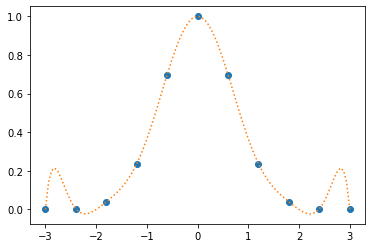

In [12]:
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xpoly,ypoly,linestyle = 'dotted')
plt.show()

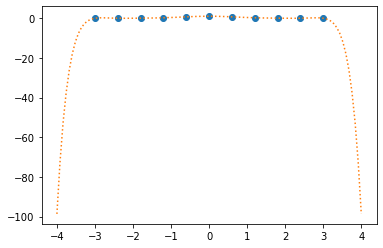

In [13]:
xpoly = np.linspace(-4,4,100)
ypoly = newton.evalPoly(a,xData,xpoly)
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xpoly,ypoly,linestyle = 'dotted')
plt.show()

## Interpolación a trozos (*piecewise interpolation*)

Como se ve en el ejemplo anterior, es difícil encontrar una sola función que pueda funcionar como interpolador, y que a su vez tenga una forma suave. Por eso se usan métodos de interpolación *a trozos*. Para eso, se define un conjunto de funciones $\{f(x)\}$ de modo tal que cada una de ellas se use para interpolar sólo un sector particular del dominio $x_0, x_1, \cdots, x_n$.

Una vez realizada la interpolación, esto es, una vez conocidas las funciones $\{f(x)\}$, la evaluación de dichas funciones (es decir, la etapa 2. descripta antes) requiere a su vez de dos pasos:

- Encontrar qué función se debe utilizar de acuerdo al valor de $x$
- Evaluar la función seleccionada en $x$

El primer paso se conoce habitualmente como *lookup*.

Veremos en detalle el ejemplo de la *interpolación lineal*.

### Interpolación lineal

Sin dudas la interpolación lineal es la más usada en física médica. Consiste en definir funciones lineales que se utilizarán para interpolar todos los valores de $x$ entre dos abscisas contiguas $x_i$ y $x_{i+1}$:

$$
p_i(x) = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} (x - x_i) + y_i
$$

En efecto, 

$$
p_i(x_i) = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} (x_i - x_i) + y_i = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} 0 + y_i = y_i
$$

mientras que

$$
p_i(x_{i+1}) = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} (x_{i+1} - x_i) + y_i = y_{i+1} - y_i + y_i = y_{i+1}
$$

Es decir que la función $p_i(x)$ verifica la condición de interpolación en $x_i$ y $x_{i+1}$.


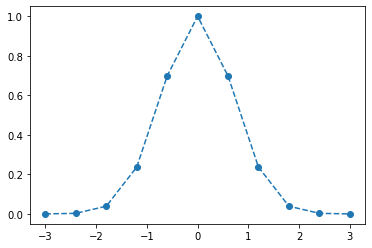

In [14]:
plt.plot(xData,yData, marker = 'o',linestyle = 'dashed')
plt.show()

### Splines cúbicos

El otro tipo de interpolación utilizado frecuentemente corresponde a los denominados *splines cúbicos*. Éstos son polinomios de tercer orden que se construyen entre dos abscisas contiguas $x_i$ y $x_{i+1}$. Sin embargo, en estos casos, además de las condiciones 

\begin{align}
y_i &= f(x_i) \\
y_{i+1} &= f(x_{i+1}),
\end{align}

es necesario imponer condiciones extras dado que un polinomio de orden 3 tiene 4 coeficientes a determinar. En general se pueden imponer condiciones sobre las derivadas primeras de la función:
\begin{align}
y'_i &= f'(x_i) \\
y'_{i+1} &= f'(x_{i+1}),
\end{align}
O el caso más común, de los splines *naturales* en los que se pide
\begin{align}
f''(x_i) &= 0  \\
f''(x_{i+1}) &= 0.
\end{align}

El álgebra para obtenerlos es algo engorrosa, así que la pueden consultar [por ahí](https://towardsdatascience.com/numerical-interpolation-natural-cubic-spline-52c1157b98ac#:~:text='Natural%20Cubic%20Spline'%20%E2%80%94%20is,to%20oscillate%20between%20data%20points.).



## Módulos al rescate: Scipy

Afortunadamente, existe un módulo que hace este tipo de cosas, y muchas más. Se trata del módulo [`scipy`](https://docs.scipy.org/doc/scipy-1.5.2/reference/). En particular, usaremos el submódulo `interpolate`:

In [15]:
from scipy.interpolate import interp1d

#### Interpolación lineal

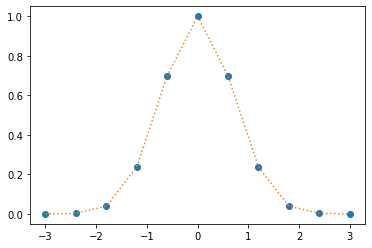

In [16]:
f_lineal = interp1d(xData,yData)  # Por defecto, la interpolación de interp1d es lineal
xs = np.linspace(-3,3,100)
ylineal = f_lineal(xs)

plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,ylineal,linestyle = 'dotted')
plt.show()

In [17]:
print(f_lineal(0.5))

0.7480636049999998


#### Interpolación cuadrática

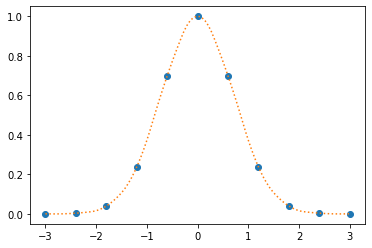

In [18]:
f_quad = interp1d(xData,yData,kind='quadratic') # Definiendo el parámetro kind, se obtienen otras interpolaciones
yquad = f_quad(xs)

plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,yquad,linestyle = 'dotted')
plt.show()

#### Interpolación cúbica

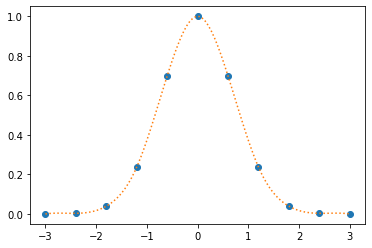

In [19]:
f_cubic = interp1d(xData,yData,kind='cubic') # Definiendo el parámetro kind, se obtienen otras interpolaciones
ycubic = f_cubic(xs)

plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,ycubic,linestyle = 'dotted')
plt.show()

Graficamos todos los ajustes juntos:

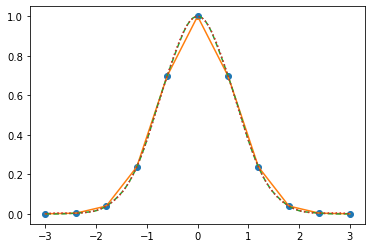

In [20]:
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,ylineal,linestyle = 'solid')
plt.plot(xs,yquad,linestyle = 'dashed')
plt.plot(xs,ycubic,linestyle = 'dotted')
plt.show()

## Fiteo de curvas

Otra tarea frecuente es ajustar parámetros de una función objetivo a partir de un *dataset* de puntos conocidos. 

Supongamos que tenemos una serie de datos medidos

In [21]:
xdata = np.array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

ydata = np.array([ 2.86176601,  2.57905526,  2.70036593,  2.63066436,  1.8035502 ,
        1.69507105,  1.71332572,  1.19968728,  1.53954472,  1.19541914,
        0.90611978,  0.7115336 ,  0.80780086,  0.64485915,  0.85535322,
        0.61878794,  0.69171233,  0.64694833,  0.23714098,  0.18498906,
        0.58324814,  0.13810763,  0.12359655,  0.33529197,  0.15601467,
        0.59733706,  0.35817119,  0.11824581,  0.08785438,  0.49333643,
       -0.09737018, -0.11026946,  0.27281943,  0.10931485,  0.27558412,
       -0.27575616,  0.21938698, -0.05069495, -0.03916167,  0.28574475,
        0.15924156, -0.21736918,  0.1431817 , -0.1881811 ,  0.00901724,
       -0.31409179, -0.11894992, -0.11414616,  0.01245554,  0.04917944])

In [23]:
print(len(ydata))

50


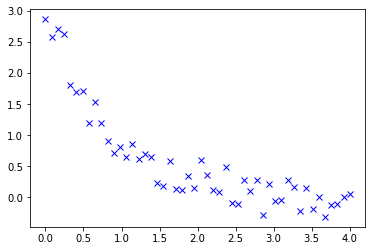

In [22]:
plt.plot(xdata, ydata, 'xb', label='DATOS')
plt.show()


In [25]:
def func(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)


[1.33780096 1.30826848 1.69846325 1.30827681]


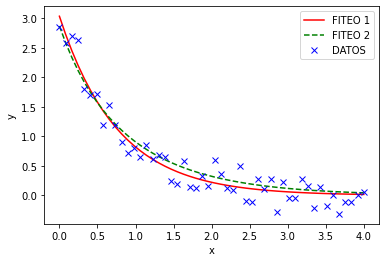

In [26]:
from scipy.optimize import curve_fit


popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

y1 = func(xdata, popt[0],popt[1],popt[2],popt[3])
#
# Una forma compacta de crear y1 es:
# y1 = func(xdata, *popt)
# en lugar de 'desenrollar popt en sus componentes [0]..[3]

plt.plot(xdata, y1, 'r-', label='FITEO 1')

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5, 4.]))
y2 = func(xdata, *popt)
plt.plot(xdata, y2, 'g--', label='FITEO 2')   

plt.plot(xdata, ydata, 'xb', label='DATOS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [27]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

In [30]:
print(pcov)
perr = np.sqrt(np.diag(pcov))
perr

[[  4.15854294   0.76302348  -4.02901848  14.17297729]
 [  0.76302348   0.14611409  -0.74263071   2.49384224]
 [ -4.02901848  -0.74263071   3.93319959 -13.52705136]
 [ 14.17297729   2.49384224 -13.52705136  52.10488222]]


array([2.03925058, 0.38224873, 1.98322959, 7.21837116])